In [1]:
W1 = randn(2, 4);
b1 = randn(1, 4);
x = randn(10, 2);

In [2]:
W1

2×4 Array{Float64,2}:
  0.467891  0.0418946   2.3809      0.180189
 -2.23774   0.693749   -0.0218883  -0.441875

In [3]:
b1

1×4 Array{Float64,2}:
 1.16429  -1.2956  1.57839  1.10975

In [4]:
x

10×2 Array{Float64,2}:
 -1.00146     1.35737  
  1.01296     2.03249  
 -1.95786     1.5105   
  1.74386     0.0978341
 -1.2145      1.4834   
 -0.401592   -0.446122 
  0.530894    2.86397  
  2.41006    -0.255267 
 -0.0285246   0.0530289
  1.19851    -0.68147  

In [5]:
h = x * W1 .+ b1

10×4 Array{Float64,2}:
 -2.34173  -0.395876  -0.835697   0.329505 
 -2.90993   0.156878   3.94567    0.394166 
 -3.13189  -0.329711  -3.11615    0.0895077
  1.7613   -1.15467    5.7282     1.38074  
 -2.72343  -0.317368  -1.34567    0.235429 
  1.97469  -1.62192    0.632008   1.23451  
 -4.99613   0.713524   2.77971   -0.0601111
  2.86315  -1.37172    7.3221     1.65681  
  1.03228  -1.26       1.50932    1.08117  
  3.25001  -1.71816    4.44683    1.62683  

In [6]:
using PyPlot

In [7]:
sigmoid(x) = 1 ./ (1 .+ exp.(-x))

sigmoid (generic function with 1 method)

In [8]:
x = -5:0.1:5;
y = sigmoid(x);

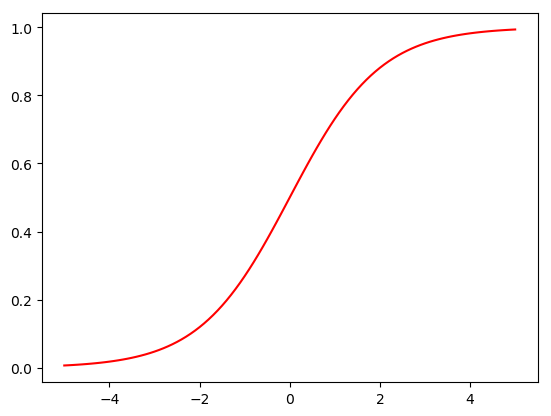

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000031627668>

In [9]:
plot(x, y, "r-")

In [10]:
x = randn(10, 2)
W1 = randn(2, 4)
b1 = randn(1, 4)
W2 = randn(4, 3)
b2 = randn(1, 3)
h = x * W1 .+ b1;
a = sigmoid(h)
s = a * W2 .+ b2

10×3 Array{Float64,2}:
  1.03029     0.583019  -0.636307
 -0.104221    2.32343   -0.579622
  0.00352906  1.73837   -0.339631
 -0.185514    1.84656   -0.338421
  0.215487    1.76237   -0.669007
  0.0973638   1.72275   -0.242436
  0.175109    1.73558   -0.224883
  0.608099    0.984967  -0.687713
  0.379466    1.41376   -0.617553
  1.15524     0.583776  -0.308279

# Neural Network unit

In [1]:
abstract type AbstractLayer
end

In [2]:
struct SigmoidLayer{T} <: AbstractLayer
    # out::T
end

In [25]:
function forward(l::SigmoidLayer{T}, x::AbstractArray{T}) where {T}
    # l.out =
    1 ./ (1 .+ exp.(-x))
end

# function backward(l::SigmoidLayer{T}, dout::T) where {T}
#    dout .* (1 .- l.out) .* l.out
# end

forward (generic function with 3 methods)

In [4]:
mutable struct AffineLayer{T} <: AbstractLayer
    W::AbstractMatrix{T}
    b::AbstractVector{T}
    x::AbstractArray{T}
    dW::AbstractMatrix{T}
    db::AbstractVector{T}
    function (::Type{AffineLayer})(W::AbstractMatrix{T}, b::AbstractVector{T}) where {T}
        layer = new{T}()
        layer.W = W
        layer.b = b
        layer
    end
end

In [5]:
alayer = AffineLayer(randn(3, 2), randn(3))

AffineLayer{Float64}([0.0846535 0.773086; 0.358338 -0.957471; 0.75408 0.325065], [-0.0163827, 0.133375, 0.0471493], #undef, #undef, #undef)

In [42]:
function forward(layer::AffineLayer{T}, x::AbstractArray{T}) where {T}
    layer.x = x
    # println(size(layer.W))
    layer.W * x .+ layer.b
end
alayer = AffineLayer(randn(3, 2), randn(3))
forward(alayer, [1.0; 2.0])

3-element Array{Float64,1}:
 1.7801671280521822
 3.033189261920609 
 2.801213843297795 

In [43]:
mutable struct TwoLayerNet{T}
    a1l::AffineLayer{T}
    sig::SigmoidLayer{T}
    a2l::AffineLayer{T}
end

In [44]:
function (::Type{TwoLayerNet{T}})(isize::Int, hsize::Int, osize::Int; 
        weight_init_std::Float64=0.01) where {T}
    W1 = weight_init_std * randn(T, hsize, isize)
    b1 = zeros(T, hsize)
    W2 = weight_init_std * randn(T, osize, hsize)
    b2 = zeros(T, osize)
    a1l = AffineLayer(W1, b1)
    sig = SigmoidLayer{T}()
    a2l = AffineLayer(W2, b2)
    TwoLayerNet(a1l, sig, a2l)
end

In [45]:
function predict(net::TwoLayerNet{T}, x::AbstractArray{T}) where {T}
    # println(size(x))
    a1 = forward(net.a1l, x');
    z1 = forward(net.sig, a1');
    a2 = forward(net.a2l, z1');
    a2'
end

predict (generic function with 1 method)

In [46]:
x = randn(10, 2);
model = TwoLayerNet{Float64}(2, 4, 3);
predict(model, x)

10×3 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.0125074  -0.00181134  -0.0125162
 0.0125815  -0.00179635  -0.0125017
 0.0125674  -0.00181852  -0.0125265
 0.0125921  -0.00178069  -0.0124842
 0.0124934  -0.00178807  -0.0124891
 0.0123559  -0.00170234  -0.0123865
 0.012501   -0.00178483  -0.0124857
 0.0124401  -0.00177761  -0.0124753
 0.0124352  -0.00175362  -0.0124478
 0.0124128  -0.00170667  -0.0123935